# Skin Detection
## Bianchi Luca (4805748)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

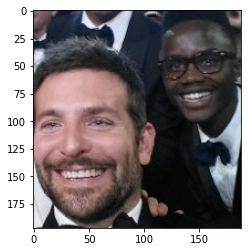

In [2]:
outputs = []
FILE_DIR = './material/images'
img = io.imread(FILE_DIR + "/BC.jpeg")
plt.imshow(img)

/tmp/ipykernel_16655/2083826398.py:10: RuntimeWarning: divide by zero encountered in true_divide
  outputs.insert(0, img_array[:, :, channel]/dividend)
/tmp/ipykernel_16655/2083826398.py:10: RuntimeWarning: invalid value encountered in true_divide
  outputs.insert(0, img_array[:, :, channel]/dividend)
/tmp/ipykernel_16655/2083826398.py:14: RuntimeWarning: divide by zero encountered in true_divide
  outputs.insert(0, img_array[:, :, channel]/dividend2)
/tmp/ipykernel_16655/2083826398.py:14: RuntimeWarning: invalid value encountered in true_divide
  outputs.insert(0, img_array[:, :, channel]/dividend2)


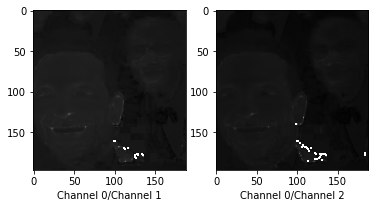

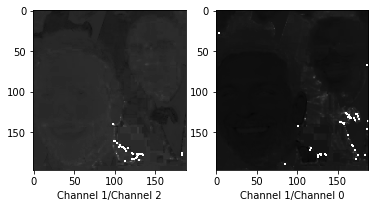

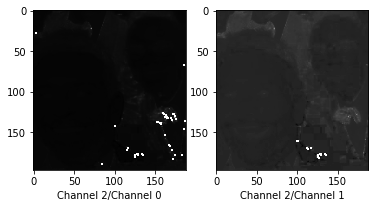

In [3]:
img_array = np.asarray(img)
for channel in range(0, img.shape[2]):

    dividend = img_array[:, :, (channel + 1) % img.shape[2]]
    dividend2 = img_array[:, :, (channel + 2) % img.shape[2]]

    plt.figure()
    plt.subplot(1,2,1)
    plt.xlabel('Channel '+str(channel)+'/Channel ' +str((channel+1)%img.shape[2]))
    outputs.insert(0, img_array[:, :, channel]/dividend)
    plt.imshow(outputs[0], cmap = "gray")
    plt.subplot(1,2,2)
    plt.xlabel('Channel '+str(channel)+'/Channel ' +str((channel+2)%img.shape[2]))
    outputs.insert(0, img_array[:, :, channel]/dividend2)
    plt.imshow(outputs[0], cmap = "gray")

Proviamo a prendere come sample Channel 1 (G) / Channel 0 (R), da cui
riusciamo a ottenere una distinzione abbastanza pulita e uniforme degli elementi
di pelle, quindi correggiamone gli artefati e visualizziamola


Ma siccome i risultati sono troppo sporchi, lasciamoli qui, per ora

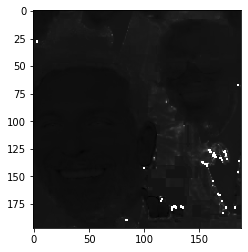

In [4]:
target = outputs[2]
plt.imshow(target, cmap="gray")

### HSB

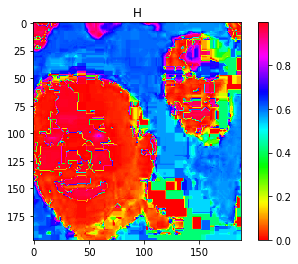

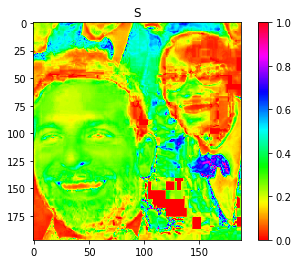

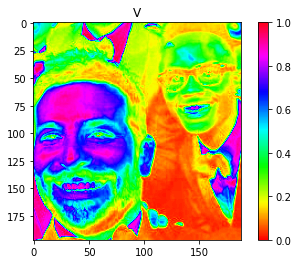

In [5]:
img_hsb = color.rgb2hsv(img[:,:,0:3])
label = ["H", "S", "V"]

for elem in range(img_hsb.shape[2]):
    plt.figure()
    plt.imshow(img_hsb[:, :, elem], cmap="hsv")
    plt.colorbar(orientation='vertical')
    plt.title(label[elem])

Proviamo a traslare la Hue in modo da portare i valori delle persone a metà range
circa per essere più comodi in fase di sogliatura

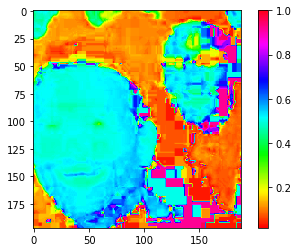

In [6]:
for x in range(len(img_hsb[:, :, 0])):
    for y in range(len(img_hsb[:, :, 0][0])):
        img_hsb[x, y, 0] += 0.5
        if img_hsb[x, y, 0] > 1:
            img_hsb[x, y, 0] -= 1
plt.imshow(img_hsb[:, :, 0], cmap='hsv')
plt.colorbar(orientation='vertical')

Proviamo ad applicare una gaussiana per eseguire lo smoothing dei colori nelle
aree più rumorose e studiamo il risultato

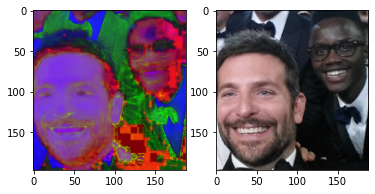

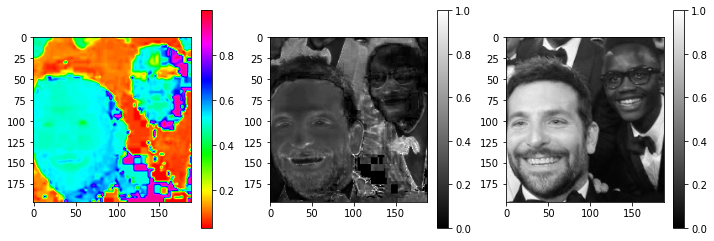

In [7]:
img_hsb[:, :, 0] = filters.gaussian(img_hsb[:, :, 0])
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_hsb)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_hsb[:, : , 0], cmap='hsv')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 2)
plt.imshow(img_hsb[:, :, 1], cmap='gray')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 3)
plt.imshow(img_hsb[:, :, 2], cmap='gray')
plt.colorbar(orientation='vertical')

Filtriamo quindi per tenere i valori della mappa di colore tra 0.3 (verde) e
0.7 (blu)

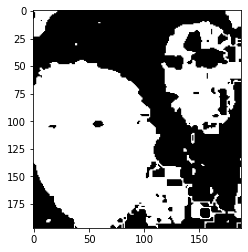

In [8]:
mask = (img_hsb[:, :, 0] > 0.45) & (img_hsb[:, :, 0] < 0.85)
plt.imshow(mask, cmap="gray")

I risultati sono...
Non ottimali, per così dire.